    
# More `Dataset`

Firstly we need to re-create our dataset object from the last notebook.
Remember it was a `TiledDataset` so we will index it to just get the first `Dataset` object.

In [3]:
import dkist
import dkist.net
from sunpy.net import Fido, attrs as a

res = Fido.search(a.dkist.Dataset('BLKGA'))
files = Fido.fetch(res, path="~/sunpy/data/{instrument}/{dataset_id}")
ds = dkist.Dataset.from_asdf(files[0])[0][0]

Exception ignored in: <function BaseEventLoop.__del__ at 0x7f90b4403d80>
Traceback (most recent call last):
  File "/usr/lib/python3.11/asyncio/base_events.py", line 694, in __del__
    self.close()
  File "/usr/lib/python3.11/asyncio/unix_events.py", line 71, in close
    self.remove_signal_handler(sig)
  File "/usr/lib/python3.11/asyncio/unix_events.py", line 160, in remove_signal_handler
    signal.signal(sig, handler)
  File "/usr/lib/python3.11/signal.py", line 56, in signal
    handler = _signal.signal(_enum_to_int(signalnum), _enum_to_int(handler))
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: signal only works in main thread of the main interpreter


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [4]:
files

['/home/stuart/sunpy/data/VBI/BLKGA/VBI_L1_20220602T172250_BLKGA.asdf']

The `Dataset` object allows us to do some basic inspection of the dataset as a whole without having to download the entire thing, using the metadata in the FITS headers.
This will save you a good amount of time and also ease the load on the DKIST servers.
For example, we can check the seeing conditions during the observation and discount any data which will not be of high enough quality to be useful.
We will go through this as an excercise later.

## The `headers` table

The FITS headers from every file in a dataset are duplicated and stored in the ASDF file.
This means that all the metadata about each file is accessible using only the ASDF file before downloading any of the actual data.
(It also means any changes you make to the headers in the headers table won't be reflected in the FITS files.)
These headers are stored as a table in the `headers` attribute of the `Dataset`.

In [5]:
ds.headers

BITPIX,NAXIS,NAXIS1,NAXIS2,BUNIT,DATE,DATE-BEG,DATE-END,TELAPSE,DATE-AVG,ORIGIN,TELESCOP,OBSRVTRY,NETWORK,INSTRUME,OBJECT,CHECKSUM,DATASUM,PCOUNT,GCOUNT,XTENSION,WCSAXES,WCSAXESA,WCSNAME,WCSNAMEA,CRPIX1,CRPIX2,CRPIX1A,CRPIX2A,CRDATE1,CRDATE2,CRDATE1A,CRDATE2A,CRVAL1,CRVAL2,CRVAL1A,CRVAL2A,CDELT1,CDELT2,CDELT1A,CDELT2A,CUNIT1,CUNIT2,CUNIT1A,CUNIT2A,CTYPE1,CTYPE2,CTYPE1A,CTYPE2A,PC1_1,PC1_2,PC2_1,PC2_2,PC1_1A,PC1_2A,PC2_1A,PC2_2A,LONPOLE,LONPOLEA,TAZIMUTH,ELEV_ANG,TELTRACK,TTBLANGL,TTBLTRCK,DATEREF,OBSGEO-X,OBSGEO-Y,OBSGEO-Z,SPECSYS,VELOSYS,OBS_VR,MAXIS,MAXIS1,MAXIS2,MINDEX1,MINDEX2,WCSVALID,DSETID,POINT_ID,FRAMEVOL,PROCTYPE,RRUNID,RECIPEID,RINSTID,EXTNAME,SOLARNET,OBS_HDU,FILENAME,CADENCE,CADMIN,CADMAX,CADVAR,LEVEL,HEADVERS,HEAD_URL,INFO_URL,CALVERS,CAL_URL,IDSPARID,IDSOBSID,WKFLNAME,WKFLVERS,DNAXIS,DNAXIS1,DNAXIS2,DNAXIS3,DTYPE1,DTYPE2,DTYPE3,DPNAME1,DPNAME2,DPNAME3,DWNAME1,DWNAME2,DWNAME3,DUNIT1,DUNIT2,DUNIT3,DAAXES,DEAXES,DINDEX3,LINEWAV,WAVEBAND,WAVEUNIT,WAVEREF,WAVEMIN,WAVEMAX,DATAMIN,DATAMAX,DATAMEAN,DATAMEDN,DATARMS,DATAKURT,DATASKEW,FILE_ID,DKISTVER,OBSPR_ID,EXPER_ID,PROP_ID,DSP_ID,IP_ID,HLSVERS,OCS_CTRL,FIDO_CFG,DSHEALTH,DSPSREPS,DSPSNUM,LIGHTLVL,CAM_ID,CAMERA,BITDEPTH,XPOSURE,TEXPOSUR,CAM_FPS,CHIPDIM1,CHIPDIM2,HWBIN1,HWBIN2,SWBIN1,SWBIN2,NSUMEXP,SWNROI,SWROI1OX,SWROI1OY,SWROI1SX,SWROI1SY,HWNROI,HWROI1OX,HWROI1OY,HWROI1SX,HWROI1SY,NBIN1,NBIN2,NBIN,FPABITPX,GOS_STAT,LVL3STAT,LAMPSTAT,LVL2STAT,POLANGLE,LVL1STAT,RETANGLE,LVL0STAT,APERTURE,LGOSSTAT,GOS_TEMP,ATMOS_R0,AO_LOCK,AO_LOCKX,AO_LOCKY,WFSLOCKX,WFSLOCKY,LIMBRPOS,LIMBRATE,WSSOURCE,WIND_SPD,WIND_DIR,WS_TEMP,WS_HUMID,WS_DEWPT,WS_PRESS,SKYBRIGT,VBIFWHM,VBISTPAT,VBINSTP,VBISTP,VBIPROCD,VBISYNCM,VBINFRAM,VBICFRAM,VBIFRIED
int64,int64,int64,int64,str2,str23,str26,str26,float64,str26,str26,str32,str40,str9,str3,str7,str16,str10,int64,int64,str5,int64,int64,str25,str24,float64,float64,float64,float64,str23,str23,str23,str23,float64,float64,float64,float64,float64,float64,float64,float64,str6,str6,str3,str3,str8,str8,str8,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str39,float64,str23,str23,float64,float64,float64,str8,float64,float64,int64,int64,int64,int64,int64,bool,str5,str5,float64,str2,int64,int64,int64,str11,int64,int64,str52,float64,float64,float64,float64,int64,str5,str59,str26,str6,str86,int64,int64,str30,str6,int64,int64,int64,int64,str7,str7,str8,str24,str25,str4,str24,str25,str4,str6,str6,str1,int64,int64,int64,float64,str15,int64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,str32,str33,str38,str9,str9,str42,str14,str10,str4,str34,str4,int64,int64,float64,str12,str13,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str4,str5,str4,str5,str4,str5,str4,str21,str9,str4,float64,float64,bool,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,str17,int64,int64,str6,str4,int64,int64,float64
-32,2,4096,4096,ct,2022-12-08T17:35:01.857,2022-06-02T17:22:50.173000,2022-06-02T17:22:50.178009,0.00500902533531189,2022-06-02T17:22:50.175505,National Solar Observatory,Daniel K. Inouye Solar Telescope,Haleakala High Altitude Observatory Site,NSF-DKIST,VBI,unknown,iYYolXWmiXWmiXWm,3818265502,0,1,IMAGE,3,3,Helioprojective-cartesian,Equatorial equinox J2000,2017.095408942058,2081.629159951704,2017.084607931842,2081.618948056116,2017-01-01T00:00:00.000,2017-01-01T00:00:00.000,2017-01-01T00:00:00.000,2017-01-01T00:00:00.000,-619.0078295262442,-407.000969847034,70.5624776333993,22.14225431897677,0.01099999994039536,0.01099999994039536,3.05555553899871e-06,3.05555553899871e-06,arcsec,arcsec,deg,deg,HPLN-TAN,HPLT-TAN,RA---TAN,DEC--TAN,0.9668882445178989,-0.01087327443963538,0.01174061598748158,0.9871200127049713,-0.9380549305536068,-0.2423209204207011,-0.2358063384635449,0.9565316163812515,180.0,180.0,72.47542633577507,20.29274117758

Since the headers are stored as a table, it is straightforward to inspect a keyword for all files at once.
For example, to see the time of every frame in the dataset:

In [7]:
ds.headers["DATE-AVG", "ATMOS_R0"]

DATE-AVG,ATMOS_R0
str26,float64
2022-06-02T17:22:50.175505,0.05357408699115538
2022-06-02T17:24:12.435505,0.09266711173979345
2022-06-02T17:25:34.695505,0.06927205771707357
...,...
2022-06-02T17:43:24.075504,0.07014558412302133
2022-06-02T17:44:46.335505,0.0882038721698429
2022-06-02T17:46:08.595505,0.1087419777784599
2022-06-02T17:47:30.855505,0.1276463776275153


In [9]:
from astropy.time import Time

In [11]:
Time(ds.headers["DATE-AVG"]).mjd

array([59732.72419185, 59732.72514393, 59732.72609601, 59732.7270481 ,
       59732.72800018, 59732.72895226, 59732.72990435, 59732.73085643,
       59732.73180851, 59732.7327606 , 59732.73371268, 59732.73466476,
       59732.73561685, 59732.73656893, 59732.73752101, 59732.7384731 ,
       59732.73942518, 59732.74037726, 59732.74132935])

In [12]:
tds = dkist.Dataset.from_asdf(files[0])

In [13]:
tds.combined_headers

BITPIX,NAXIS,NAXIS1,NAXIS2,BUNIT,DATE,DATE-BEG,DATE-END,TELAPSE,DATE-AVG,ORIGIN,TELESCOP,OBSRVTRY,NETWORK,INSTRUME,OBJECT,CHECKSUM,DATASUM,PCOUNT,GCOUNT,XTENSION,WCSAXES,WCSAXESA,WCSNAME,WCSNAMEA,CRPIX1,CRPIX2,CRPIX1A,CRPIX2A,CRDATE1,CRDATE2,CRDATE1A,CRDATE2A,CRVAL1,CRVAL2,CRVAL1A,CRVAL2A,CDELT1,CDELT2,CDELT1A,CDELT2A,CUNIT1,CUNIT2,CUNIT1A,CUNIT2A,CTYPE1,CTYPE2,CTYPE1A,CTYPE2A,PC1_1,PC1_2,PC2_1,PC2_2,PC1_1A,PC1_2A,PC2_1A,PC2_2A,LONPOLE,LONPOLEA,TAZIMUTH,ELEV_ANG,TELTRACK,TTBLANGL,TTBLTRCK,DATEREF,OBSGEO-X,OBSGEO-Y,OBSGEO-Z,SPECSYS,VELOSYS,OBS_VR,MAXIS,MAXIS1,MAXIS2,MINDEX1,MINDEX2,WCSVALID,DSETID,POINT_ID,FRAMEVOL,PROCTYPE,RRUNID,RECIPEID,RINSTID,EXTNAME,SOLARNET,OBS_HDU,FILENAME,CADENCE,CADMIN,CADMAX,CADVAR,LEVEL,HEADVERS,HEAD_URL,INFO_URL,CALVERS,CAL_URL,IDSPARID,IDSOBSID,WKFLNAME,WKFLVERS,DNAXIS,DNAXIS1,DNAXIS2,DNAXIS3,DTYPE1,DTYPE2,DTYPE3,DPNAME1,DPNAME2,DPNAME3,DWNAME1,DWNAME2,DWNAME3,DUNIT1,DUNIT2,DUNIT3,DAAXES,DEAXES,DINDEX3,LINEWAV,WAVEBAND,WAVEUNIT,WAVEREF,WAVEMIN,WAVEMAX,DATAMIN,DATAMAX,DATAMEAN,DATAMEDN,DATARMS,DATAKURT,DATASKEW,FILE_ID,DKISTVER,OBSPR_ID,EXPER_ID,PROP_ID,DSP_ID,IP_ID,HLSVERS,OCS_CTRL,FIDO_CFG,DSHEALTH,DSPSREPS,DSPSNUM,LIGHTLVL,CAM_ID,CAMERA,BITDEPTH,XPOSURE,TEXPOSUR,CAM_FPS,CHIPDIM1,CHIPDIM2,HWBIN1,HWBIN2,SWBIN1,SWBIN2,NSUMEXP,SWNROI,SWROI1OX,SWROI1OY,SWROI1SX,SWROI1SY,HWNROI,HWROI1OX,HWROI1OY,HWROI1SX,HWROI1SY,NBIN1,NBIN2,NBIN,FPABITPX,GOS_STAT,LVL3STAT,LAMPSTAT,LVL2STAT,POLANGLE,LVL1STAT,RETANGLE,LVL0STAT,APERTURE,LGOSSTAT,GOS_TEMP,ATMOS_R0,AO_LOCK,AO_LOCKX,AO_LOCKY,WFSLOCKX,WFSLOCKY,LIMBRPOS,LIMBRATE,WSSOURCE,WIND_SPD,WIND_DIR,WS_TEMP,WS_HUMID,WS_DEWPT,WS_PRESS,SKYBRIGT,VBIFWHM,VBISTPAT,VBINSTP,VBISTP,VBIPROCD,VBISYNCM,VBINFRAM,VBICFRAM,VBIFRIED
int64,int64,int64,int64,str2,str23,str26,str26,float64,str26,str26,str32,str40,str9,str3,str7,str16,str10,int64,int64,str5,int64,int64,str25,str24,float64,float64,float64,float64,str23,str23,str23,str23,float64,float64,float64,float64,float64,float64,float64,float64,str6,str6,str3,str3,str8,str8,str8,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str39,float64,str23,str23,float64,float64,float64,str8,float64,float64,int64,int64,int64,int64,int64,bool,str5,str5,float64,str2,int64,int64,int64,str11,int64,int64,str52,float64,float64,float64,float64,int64,str5,str59,str26,str6,str86,int64,int64,str30,str6,int64,int64,int64,int64,str7,str7,str8,str24,str25,str4,str24,str25,str4,str6,str6,str1,int64,int64,int64,float64,str15,int64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,str32,str33,str38,str9,str9,str42,str14,str10,str4,str34,str4,int64,int64,float64,str12,str13,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str4,str5,str4,str5,str4,str5,str4,str21,str9,str4,float64,float64,bool,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,str17,int64,int64,str6,str4,int64,int64,float64
-32,2,4096,4096,ct,2022-12-08T17:35:01.857,2022-06-02T17:22:50.173000,2022-06-02T17:22:50.178009,0.00500902533531189,2022-06-02T17:22:50.175505,National Solar Observatory,Daniel K. Inouye Solar Telescope,Haleakala High Altitude Observatory Site,NSF-DKIST,VBI,unknown,iYYolXWmiXWmiXWm,3818265502,0,1,IMAGE,3,3,Helioprojective-cartesian,Equatorial equinox J2000,2017.095408942058,2081.629159951704,2017.084607931842,2081.618948056116,2017-01-01T00:00:00.000,2017-01-01T00:00:00.000,2017-01-01T00:00:00.000,2017-01-01T00:00:00.000,-619.0078295262442,-407.000969847034,70.5624776333993,22.14225431897677,0.01099999994039536,0.01099999994039536,3.05555553899871e-06,3.05555553899871e-06,arcsec,arcsec,deg,deg,HPLN-TAN,HPLT-TAN,RA---TAN,DEC--TAN,0.9668882445178989,-0.01087327443963538,0.01174061598748158,0.9871200127049713,-0.9380549305536068,-0.2423209204207011,-0.2358063384635449,0.9565316163812515,180.0,180.0,72.47542633577507,20.29274117758

Or we can look at one or more rows (i.e.: files) by slicing the table.

In [8]:
ds.headers[:5]

BITPIX,NAXIS,NAXIS1,NAXIS2,BUNIT,DATE,DATE-BEG,DATE-END,TELAPSE,DATE-AVG,ORIGIN,TELESCOP,OBSRVTRY,NETWORK,INSTRUME,OBJECT,CHECKSUM,DATASUM,PCOUNT,GCOUNT,XTENSION,WCSAXES,WCSAXESA,WCSNAME,WCSNAMEA,CRPIX1,CRPIX2,CRPIX1A,CRPIX2A,CRDATE1,CRDATE2,CRDATE1A,CRDATE2A,CRVAL1,CRVAL2,CRVAL1A,CRVAL2A,CDELT1,CDELT2,CDELT1A,CDELT2A,CUNIT1,CUNIT2,CUNIT1A,CUNIT2A,CTYPE1,CTYPE2,CTYPE1A,CTYPE2A,PC1_1,PC1_2,PC2_1,PC2_2,PC1_1A,PC1_2A,PC2_1A,PC2_2A,LONPOLE,LONPOLEA,TAZIMUTH,ELEV_ANG,TELTRACK,TTBLANGL,TTBLTRCK,DATEREF,OBSGEO-X,OBSGEO-Y,OBSGEO-Z,SPECSYS,VELOSYS,OBS_VR,MAXIS,MAXIS1,MAXIS2,MINDEX1,MINDEX2,WCSVALID,DSETID,POINT_ID,FRAMEVOL,PROCTYPE,RRUNID,RECIPEID,RINSTID,EXTNAME,SOLARNET,OBS_HDU,FILENAME,CADENCE,CADMIN,CADMAX,CADVAR,LEVEL,HEADVERS,HEAD_URL,INFO_URL,CALVERS,CAL_URL,IDSPARID,IDSOBSID,WKFLNAME,WKFLVERS,DNAXIS,DNAXIS1,DNAXIS2,DNAXIS3,DTYPE1,DTYPE2,DTYPE3,DPNAME1,DPNAME2,DPNAME3,DWNAME1,DWNAME2,DWNAME3,DUNIT1,DUNIT2,DUNIT3,DAAXES,DEAXES,DINDEX3,LINEWAV,WAVEBAND,WAVEUNIT,WAVEREF,WAVEMIN,WAVEMAX,DATAMIN,DATAMAX,DATAMEAN,DATAMEDN,DATARMS,DATAKURT,DATASKEW,FILE_ID,DKISTVER,OBSPR_ID,EXPER_ID,PROP_ID,DSP_ID,IP_ID,HLSVERS,OCS_CTRL,FIDO_CFG,DSHEALTH,DSPSREPS,DSPSNUM,LIGHTLVL,CAM_ID,CAMERA,BITDEPTH,XPOSURE,TEXPOSUR,CAM_FPS,CHIPDIM1,CHIPDIM2,HWBIN1,HWBIN2,SWBIN1,SWBIN2,NSUMEXP,SWNROI,SWROI1OX,SWROI1OY,SWROI1SX,SWROI1SY,HWNROI,HWROI1OX,HWROI1OY,HWROI1SX,HWROI1SY,NBIN1,NBIN2,NBIN,FPABITPX,GOS_STAT,LVL3STAT,LAMPSTAT,LVL2STAT,POLANGLE,LVL1STAT,RETANGLE,LVL0STAT,APERTURE,LGOSSTAT,GOS_TEMP,ATMOS_R0,AO_LOCK,AO_LOCKX,AO_LOCKY,WFSLOCKX,WFSLOCKY,LIMBRPOS,LIMBRATE,WSSOURCE,WIND_SPD,WIND_DIR,WS_TEMP,WS_HUMID,WS_DEWPT,WS_PRESS,SKYBRIGT,VBIFWHM,VBISTPAT,VBINSTP,VBISTP,VBIPROCD,VBISYNCM,VBINFRAM,VBICFRAM,VBIFRIED
int64,int64,int64,int64,str2,str23,str26,str26,float64,str26,str26,str32,str40,str9,str3,str7,str16,str10,int64,int64,str5,int64,int64,str25,str24,float64,float64,float64,float64,str23,str23,str23,str23,float64,float64,float64,float64,float64,float64,float64,float64,str6,str6,str3,str3,str8,str8,str8,str8,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str39,float64,str23,str23,float64,float64,float64,str8,float64,float64,int64,int64,int64,int64,int64,bool,str5,str5,float64,str2,int64,int64,int64,str11,int64,int64,str52,float64,float64,float64,float64,int64,str5,str59,str26,str6,str86,int64,int64,str30,str6,int64,int64,int64,int64,str7,str7,str8,str24,str25,str4,str24,str25,str4,str6,str6,str1,int64,int64,int64,float64,str15,int64,str3,float64,float64,float64,float64,float64,float64,float64,float64,float64,str32,str33,str38,str9,str9,str42,str14,str10,str4,str34,str4,int64,int64,float64,str12,str13,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str4,str5,str4,str5,str4,str5,str4,str21,str9,str4,float64,float64,bool,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,str17,int64,int64,str6,str4,int64,int64,float64
-32,2,4096,4096,ct,2022-12-08T17:35:01.857,2022-06-02T17:22:50.173000,2022-06-02T17:22:50.178009,0.00500902533531189,2022-06-02T17:22:50.175505,National Solar Observatory,Daniel K. Inouye Solar Telescope,Haleakala High Altitude Observatory Site,NSF-DKIST,VBI,unknown,iYYolXWmiXWmiXWm,3818265502,0,1,IMAGE,3,3,Helioprojective-cartesian,Equatorial equinox J2000,2017.095408942058,2081.629159951704,2017.084607931842,2081.618948056116,2017-01-01T00:00:00.000,2017-01-01T00:00:00.000,2017-01-01T00:00:00.000,2017-01-01T00:00:00.000,-619.0078295262442,-407.000969847034,70.5624776333993,22.14225431897677,0.01099999994039536,0.01099999994039536,3.05555553899871e-06,3.05555553899871e-06,arcsec,arcsec,deg,deg,HPLN-TAN,HPLT-TAN,RA---TAN,DEC--TAN,0.9668882445178989,-0.01087327443963538,0.01174061598748158,0.9871200127049713,-0.9380549305536068,-0.2423209204207011,-0.2358063384635449,0.9565316163812515,180.0,180.0,72.47542633577507,20.29274117758

The table is an instance of {obj}`astropy.table.Table`, and can therefore be inspected and manipulated in any of the usual ways for Table objects.
Details of how to work with `Table` can be found on the astropy documentation.
Notably though, columns can be used as arrays in many contexts.
They can therefore be used for plotting, which allows us to visually inspect how metadata values vary over the many files in the dataset.
For example, we might want to inspect the seeing conditions and plot the Fried parameter for all frames.

First, if you're not familiar with all of the keywords in the header, they can be checked in the documentation.
Helpfully, `Dataset` provides some additional metadata which includes a link to that documentation:

In [15]:
ds.meta["inventory"]["headerDocumentationUrl"]

'https://docs.dkist.nso.edu/projects/data-products/en/v3.0.0'

If you follow this link and then click on "Level One FITS Specification" you will find a list of all the FITS keywords used for level 1 data with a description of each.
Using this we can find that the Fried parameter is stored with the keyword `"ATMOS_R0"`.
Then it's trivial to plot this information:

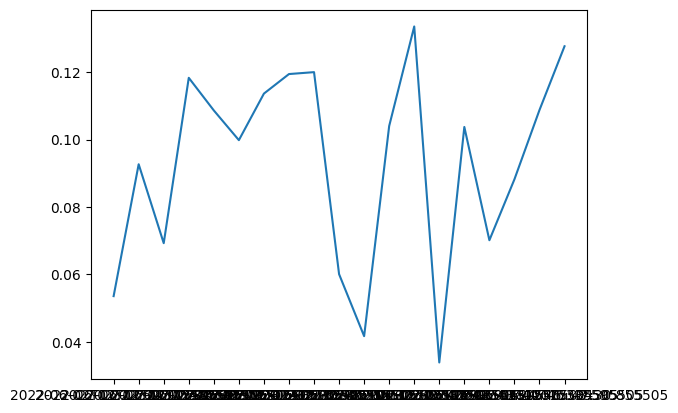

In [18]:
import matplotlib.pyplot as plt

plt.plot(ds.headers["DATE-AVG"], ds.headers["ATMOS_R0"])

Or we can use multiple columns from the headers to compare information or look at related values.

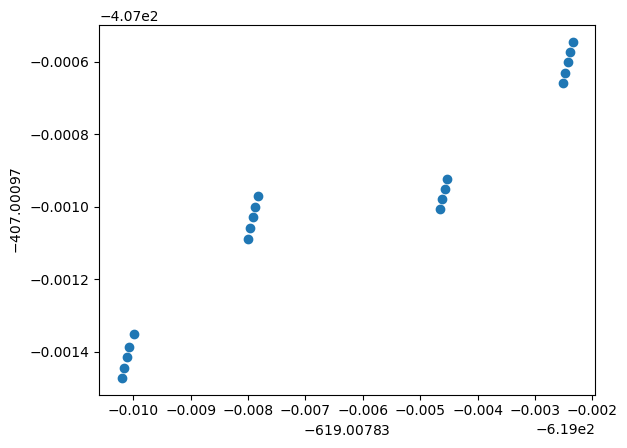

In [22]:
from astropy.visualization import quantity_support

quantity_support()
ref_coord1 = ds.headers["CRVAL1"] * u.Unit(ds.headers[0]["CRVAL1"])
ref_coord2 = ds.headers["CRVAL2"] * u.Unit(ds.headers[0]["CRVAL2"])

plt.scatter(ref_coord1, ref_coord2)

## Tracking files

`Dataset` tracks information about the individual files that make up the datset in the `files` attribute.

In [23]:
ds.files

FileManager containing 19 files with each array having shape (4096, 4096)

This tells us that our (19, 4096, 4096) data array is stored as 19 files, each containing an array of (4096, 4096).
Since the filenames are automatically generated from observation metadata, the `files` attribute can also track those before we even download the data.

In [24]:
ds.files.filenames

['VBI_2022_06_02T17_22_50_173_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_24_12_433_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_25_34_693_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_26_56_953_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_28_19_213_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_29_41_473_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_31_03_733_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_32_25_993_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_33_48_253_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_35_10_513_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_36_32_773_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_37_55_033_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_39_17_293_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_40_39_553_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_42_01_813_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_43_24_073_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_44_46_333_00486136_I_BLKGA_L1.fits',
 'VBI_2022_06_02T17_46_08_593_0

`Dataset` also knows the base path of the data - the path where the data is (or will be) saved.

In [25]:
ds.files.basepath

PosixPath('/home/stuart/sunpy/data/VBI/BLKGA')

When we download the data for this dataset later on, this is where it will be saved.
So in general you may want to use the path interpolation feature of the various download functions to keep your data files arranged sensibly, as we have for this example.

### Reducing file downloads
We have mentioned a few times already that we can reduce the size of a data download by finding just the data that interests us and slicing the dataset down to just that portion.
However, there is an important point to note about this, which is that you need to keep in mind how the data are stored across the dataset's files.
For this example let's use a larger and more complicated dataset.

In [28]:
ds = dkist.Dataset.from_asdf(
    Fido.fetch(
        Fido.search(a.dkist.Dataset("AGLKO")),
        path="~/sunpy/data/{instrument}/{dataset_id}")[0])

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [27]:
ds.files

FileManager containing 4000 files with each array having shape (1, 976, 2555)

So in this case we can see that each FITS file contains effectively a 2D image - a single raster step at one polarisation state - and that we have many of these files to make a full 4D dataset.
What this means is that if we look at a subset of the scan steps or polarisation states, we will reduce the number of files across which the array is stored.

In [29]:
ds[0]

This Dataset has 3 pixel and 4 world dimensions

dask.array<getitem, shape=(1000, 976, 2555), dtype=float64, chunksize=(1, 976, 2555), chunktype=numpy.ndarray>

Pixel Dim  Axis Name                Data size  Bounds
        0  raster scan step number       1000  None
        1  dispersion axis                976  None
        2  spatial along slit            2555  None

World Dim  Axis Name                  Physical Type                   Units
        0  time                       time                            s
        1  helioprojective longitude  custom:pos.helioprojective.lon  arcsec
        2  wavelength                 em.wl                           nm
        3  helioprojective latitude   custom:pos.helioprojective.lat  arcsec

Correlation between pixel and world axes:

             Pixel Dim
World Dim    0    1    2
        0  yes   no   no
        1  yes   no  yes
        2   no  yes   no
        3  yes   no  yes

First, notice that when we slice a `Dataset` like this, the output we get here shows us not just the updated array shape but also the updated dimensions.
Because we're looking at a single polarisation state, that axis and the corresponding physical axis have been removed.

Going back to the `files` attribute, we can see that we do indeed have fewer files for this subset of the data.

In [30]:
ds[0].files

FileManager containing 1000 files with each array having shape (1, 976, 2555)

However, if we decide we want to look at a single wavelength, we are taking a row of pixels from every single file.
So although we reduce the dimensions of the array, we are not reducing the number of files we need to reference - and therefore download.

In [31]:
ds[:, :, 500, :].data.shape

(4, 1000, 2555)

In [33]:
ds[:, :, 500, :].files

FileManager containing 4000 files with each array having shape (1, 976, 2555)

In [37]:
ds.files.fileuri_array

array([['VISP_2022_10_24T21_28_07_502_00630205_I_AGLKO_L1.fits',
        'VISP_2022_10_24T21_28_10_619_00630205_I_AGLKO_L1.fits',
        'VISP_2022_10_24T21_28_13_736_00630205_I_AGLKO_L1.fits', ...,
        'VISP_2022_10_24T22_19_54_937_00630205_I_AGLKO_L1.fits',
        'VISP_2022_10_24T22_19_58_054_00630205_I_AGLKO_L1.fits',
        'VISP_2022_10_24T22_20_01_171_00630205_I_AGLKO_L1.fits'],
       ['VISP_2022_10_24T21_28_07_502_00630205_Q_AGLKO_L1.fits',
        'VISP_2022_10_24T21_28_10_619_00630205_Q_AGLKO_L1.fits',
        'VISP_2022_10_24T21_28_13_736_00630205_Q_AGLKO_L1.fits', ...,
        'VISP_2022_10_24T22_19_54_937_00630205_Q_AGLKO_L1.fits',
        'VISP_2022_10_24T22_19_58_054_00630205_Q_AGLKO_L1.fits',
        'VISP_2022_10_24T22_20_01_171_00630205_Q_AGLKO_L1.fits'],
       ['VISP_2022_10_24T21_28_07_502_00630205_U_AGLKO_L1.fits',
        'VISP_2022_10_24T21_28_10_619_00630205_U_AGLKO_L1.fits',
        'VISP_2022_10_24T21_28_13_736_00630205_U_AGLKO_L1.fits', ...,
        

## Downloading the quality report and preview movie

For each dataset a quality report is produced during calibration which gives useful information about the quality of the data.
This is accessible through the `Dataset`'s `quality_report()` method, which will download a PDF of the quality report to the base path of the dataset.
This uses parfive underneath, which is the same library `Fido` uses, so it will return the same kind of `results` object.
If the download has been successful, this can be treated as a list of filenames.

In [39]:
qr = ds.files.quality_report()
qr

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['/home/stuart/sunpy/data/VISP/AGLKO/AGLKO.pdf']

This method takes the optional arguments `path` and `overwrite`.
`path` allows you to specify a different location for the download, and `overwrite` is a boolean which tells the method whether or not to download a new copy if the file already exists.

Similarly, each dataset also has a short preview movie showing the data.
This can be downloaded in exactly the same way as the quality report but using the `preview_movie()` method:

In [40]:
pm = ds.files.preview_movie()
pm

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

['/home/stuart/sunpy/data/VISP/AGLKO/AGLKO.mp4']